In [1]:
import numpy as np
import pandas as pd
import requests
import tweepy
import json
import regex as re
import os
import time
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline

# Introduction

In this workbook, I will create analyses and visualizations to gain more insights into how Dogs are rated on social media (i.e. Twitter) from 3 data sets coming from different sources. I'll gather all the data set and wrangle the data before performing any analyses. The structure of this workbook is as follows:

1. [Gathering data](#1)
2. [Assessing data and documenting issues](#2)
3. [Cleaning data](#3)
4. [Storing data](#4)
5. [Analyzing and visualizing data](#5)
6. [Reporting](#6)

# 1. <a id=1></a> Gathering data

### 1.1. Import the First data set - Twitter_archive.csv

The `twitter_archive.csv` data set was provided as a csv file so I'll use regular pandas read_csv method

In [2]:
twitter_archive = pd.read_csv('C://Users//hangt//OneDrive//Documents//Udacity_data_analyst//Project 4 - Data Wrangling//twitter-archive-enhanced.csv')

#viewing the first 5 rows of the dataframe. The dataframe was read in correctly
twitter_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 1.2. Read the Second data set - tweet-json.txt

The second data set was gathered from Twitter API using tweepy as the wrapper. I query the Twitter's API using the script in the `Gather_Twitter_API.ipynb` file. The output of the query was a .txt file with content in json format. Below, I'll open the output .txt file, read each line and collect information on `tweet_id`, `retweet_count`, `favorite_count` and structure the information into a dataframe format

In [3]:
#Creating an empty list to append dictionaries, each contain key-value pairs
tweet_list = []

#opening the file in 'r' mode and read each line. For each line, extract information needed

with open('C://Users//hangt//tweet-json.txt', 'r', encoding="utf-8") as file:
    for line in file:
        data = json.loads(line)
        tweet_id = data['id_str']
        retweet_count = data['retweet_count']
        favorite_count = data['favorite_count']
    #create a dictionary and append it to list:
        tweet_dict = {'tweet_id' : tweet_id,
                      'retweet_count': retweet_count,
                      'favorite_count': favorite_count
        }
    #through each iteration of the for-loop, append a dictionary to the empty list above
        tweet_list.append(tweet_dict)

#convert a list to a Pandas dataframe

json_df = pd.DataFrame(tweet_list)
print(json_df)

                tweet_id  retweet_count  favorite_count
0     892420643555336193           8853           39467
1     892177421306343426           6514           33819
2     891815181378084864           4328           25461
3     891689557279858688           8964           42908
4     891327558926688256           9774           41048
...                  ...            ...             ...
2349  666049248165822465             41             111
2350  666044226329800704            147             311
2351  666033412701032449             47             128
2352  666029285002620928             48             132
2353  666020888022790149            532            2535

[2354 rows x 3 columns]


It can be seen that the creation of the dataframe with gathered information was successful

### 1.3. Gather the third data set - image_predictions.tsv

The image_prediction.tsv is hosted on Udacity's servers so I'll download it programmatically using the `requests` library

In [4]:
#request the data from Udacity server via an URL and return an object that has features such as `contents`. `headers`. 
#However, we will use .content to access the content

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)

print(response.status_code)

200


In [5]:
# get the content of the response

response.content

b"tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog\n666020888022790149\thttps://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg\t1\tWelsh_springer_spaniel\t0.465074\tTrue\tcollie\t0.156665\tTrue\tShetland_sheepdog\t0.0614285\tTrue\n666029285002620928\thttps://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg\t1\tredbone\t0.506826\tTrue\tminiature_pinscher\t0.07419169999999999\tTrue\tRhodesian_ridgeback\t0.07201\tTrue\n666033412701032449\thttps://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg\t1\tGerman_shepherd\t0.596461\tTrue\tmalinois\t0.13858399999999998\tTrue\tbloodhound\t0.11619700000000001\tTrue\n666044226329800704\thttps://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg\t1\tRhodesian_ridgeback\t0.408143\tTrue\tredbone\t0.360687\tTrue\tminiature_pinscher\t0.222752\tTrue\n666049248165822465\thttps://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg\t1\tminiature_pinscher\t0.560311\tTrue\tRottweiler\t0.243682\tTrue\tDoberman\t0.154629\tTrue\n666050758794694657\thttps://pbs.twimg.com/

In [6]:
#Create a folder

folder_name = 'C://Users//hangt//OneDrive//Documents//Udacity_data_analyst//Project 4 - Data Wrangling'


#save the content of the file locally

with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as img_pred:
    img_pred.write(response.content)

In [7]:
#now the file has been created, so I'll read the tsv file to Python

pred = pd.read_csv(os.path.join(folder_name, url.split('/')[-1]), sep = '\t')

pred.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


The third data set has been read correctly

#  2. <a id=2></a> Assessing the data


In this section I will both visually and programmatically assess the quality of the data

**Visually speaking**, when I used the `.head()` method:
- The first data seems to have a lot of missing values (i.e. NaN) in the `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`. So this could potentially a data quality issue. 
- The data in the `source` column is dirty since it still has html tag (i.e. "a href") format instead of being in a string format.
- The columns of dog stages `doggo`, `floofer`, `pupper`, `puppo` are untidy. This could be group in one variable called `dog_phase`

Now, let's assess the data **programmatically**:

In [8]:
# Viewing the general information of the twitter_archive data frame using .info() method

twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

By using .info() method, I found that:

- There are 17 columns with 2356 observations in the `twitter_archive` data frame. However, the `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`columns have mostly missing values (i.e. NaN). Therefore, this is a dirty data issue. Based on the instruction that we only focus on "original tweets" as opposed to "reply" or "retweet", we could use these columns to screen out the tweets that are not original (i.e. supposed the those with non-null values for those columns are either "reply" or "retweet")
- The `expanded_urls` has missing values
- `tweet_id` currenly is stored as `int64` when it should be a string (i.e. object)
- `timestamp` is currently stored as `object` when it should be `datetime` type

In [9]:
#check the number of unique tweet_id

twitter_archive.tweet_id.duplicated().sum()

#there is no issue with duplicated tweet_id

0

In [10]:
#check the content of the first observation in the `text` column to find potential dirty data issues:

twitter_archive.text[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

The above shows that the rating "13/10" and a link are present in the text. This is not a dirty data issue since the data type, which is 'object' is correct. However, this is a messy data issue since information is present where it should not be.

In [11]:
#check the content of the first observation in the `source` column since we suspected a dirty data issue here:

twitter_archive.source[0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

The HTML tag is present (i.e. '<a href=') so this could potentially prevent accurate accessing or using the data

Since the WeRateDog twitter is popular for having a `rating_numerator` larger than 10, `rating_numerator`s that are lower than 10 could be considered invalid data, which is a dirty data issue.

In [12]:
#check if there is any rating_numerator is lower than 10

len(twitter_archive.query('rating_numerator < 10'))

440

There are 440 entries that have `rating_numerator`s that are lower than 10 so there is indeed a data validation issue

In [13]:
#Check if there are any tweets later than August 1st 2017

## Convert the `timestamp` column into `datetime` data type

twitter_archive.copy().timestamp = pd.to_datetime(twitter_archive.timestamp)

## Query the twitter IDs that are earlier than August 1st 2017

time_test = twitter_archive.copy().timestamp > '2017-08-01 00:00:00 +0000'

twitter_archive[time_test]

## the number of tweets that are beyond `August 1st 2017`

len(twitter_archive[time_test])

2

In [14]:
# Viewing the summary info of the `pred` data frame
pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


There do not appear to be a data type issue as all variables currently are stored in their respective correct data types. There are no missing data either

In [15]:
#viewing the summary info of the `json_df` data fram to check:

json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


There are no missing values or incorrect data type issues in this data frame

#####  With all of the visual and programmatic assessment above, I can documenting the data qualities issue as below:

1. **Dirty Data**

- 5 columns, i.e. `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp` have more than 90% missing values
- The `source` column has invalid data. the url should be in the form of a string but it still have the html tag such as <a href => 
- `tweet_id` type is currently `int64` when it should be `object`
- `Expanded_urls` has only 2297 non null values (3%) missing values.
- `timestamp` is currently object type
- `Doggo` columns has 2 distinct values "None/Doggo", it would be easier and cleaner to use boolean values
- Some `Rating_numerator` has a value of less than 10
- There are 2 tweets that have timestamps beyond August 1st 2017
- Some tweets in the `twitter_archive` data set are actually *retweets* since they have non-null values for `retweeted_status_id` column
- Some dogs don't have name or are named as 'a'
- In the `pred` data frame, `tweet_id` is currently in int64

2. **Messy Data**

- All doggos should be in one column instead of 4 columns
- The `text` column's values contain both a link and a rating.
- There are 3 predictions for the dog breed in the "pred" dataframe.

# 3. <a id=3></a> Cleaning Data

Before cleaning, I'll make a copy of each dataframe to avoid corrupting the original data. The copies of data frames are called `archive_clean`, `pred_clean`, and `json_api_clean`

In [16]:
#create a copy of `twitter_archive`
archive_clean = twitter_archive.copy()
#create a copy of `json_df`
json_api_clean = json_df.copy()
#create a copy of `pred` dataframe
pred_clean = pred.copy()

###### 1. Clean up tweets that are actually retweets and remove similar columns

**Define**
- Query the tweets that are actually retweets (i.e. those that have non-null values for retweeted_status_id column)
- Drop the rows that  are retweets and update the `archive_clean` dataframe
- Now the 5 columns, i.e. `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp` are no longer needed. So I'll drop all those five columns

**Code**

In [17]:
# Query the tweets that are actually retweets (i.e. those that have non-null values for retweeted_status_id column)

is_retweets = archive_clean.retweeted_status_id.notna()

#drop the rows that  are retweets and update the twitter_archive dataframe

archive_clean = archive_clean[-is_retweets]

In [18]:
# Now the 5 columns, i.e. `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`
# are no longer needed. So I'll drop all those five columns

archive_clean = archive_clean.drop(columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'])

**Test**

I'll visually assess the `archive_clean` dataframe after the above clean up, As can be seen in the two following code cells. the 5 `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp` columns no longer exist. The number of observations reduced from 2356 to 2175 rows, indicating some retweet rows have been dropped successfully

In [19]:
archive_clean.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [20]:
#check the size of the `archive_clean`

archive_clean.shape

(2175, 12)

###### 2. Correct the data type for `tweet_id` and `timestamp`

**Define**
- Convert `tweet_id` from 'int64' to 'object'
- Convert `timestamp` from 'object' to 'datetime'

**Code**

In [21]:
#correct the data type for `tweet_id` and `timestamp`

## convert `tweet_id` from 'int64' to 'object'

archive_clean.tweet_id = archive_clean.tweet_id.astype(object)

## convert `timestamp` from 'object' to 'datetime'

archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)


**Test**

The following code cell shows that tweet_id and timestamp have been successfully converted to 'object' and datetime64, respectively


In [22]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   int64              
 6   rating_denominator  2175 non-null   int64              
 7   name                2175 non-null   object             
 8   doggo               2175 non-null   object             
 9   floofer             2175 non-null   object             
 10  pupper              2175 non-null   object             
 11  puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

###### 3. Clean up messy data in column source

**Define**
- Remove the 'source' column since values in this column are the same for all tweets and the text'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>' is not useful for the analysis.
- Remove the `expanded_urls` column as well since this is not useful for the analysis

**Code**

In [23]:
# remove the HTML tag in the `source` column. We could do that but I noticed that all of the values in this column are the same, i.e. 
#'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', this piece of information is not necessary for the analysis
#so I'll drop this column

archive_clean = archive_clean.drop(columns = ['source', 'expanded_urls'])

**Test**

The following code show that the `source` column is successfully removed

In [24]:
archive_clean.head(2)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None


Next, I'll inspect the data in the `rating_numerator` and `rating_denominator` columns to check if there are any invalid values.

In [25]:
#check values associated with counts for each rating numerator

archive_clean.rating_numerator.value_counts()

12      500
10      442
11      426
13      307
9       156
8        98
7        54
14       43
5        36
6        32
3        19
4        17
2         9
1         8
0         2
420       2
88        1
144       1
143       1
121       1
99        1
75        1
45        1
27        1
17        1
15        1
20        1
24        1
26        1
44        1
50        1
60        1
80        1
1776      1
960       1
666       1
84        1
204       1
182       1
165       1
Name: rating_numerator, dtype: int64

It can be seen that there are a lot of invalid rating_numerator values but since the ratings are mainly tongue-in-check and the values are not normally distributed, it is impossible to impute invalid data. Therefore, I'll keep the rating numerators as is.

In [26]:
#check values associated with counts for each rating denominator

archive_clean.rating_denominator.value_counts()

10     2153
50        3
11        2
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

###### 4. Coerce all denominators of ratings to 10.

**Define**
- Since the denominators of ratings are always 10, I'll create coerce any values that are different from 10 to 10.

**Code**

In [27]:
#convert all denominator rating to 10

archive_clean.rating_denominator = 10

**Test**

The following code cell shows that all rating denominators are now 10

In [28]:
archive_clean.rating_denominator.value_counts()

10    2175
Name: rating_denominator, dtype: int64

###### 5. Tidy up the columns on doggo phases

**Define**
- Add a column called `phase` to `archive_clean` data frame and is currently empty
- Put the 'doggo' value in the phase column for all tweets that has doggo value in the `doggo` column. Perform similar steps for `floofer`, `pupper`, and `puppo` columns
- Fill the values with NaN in the `phase` column to None
- Drop the `doggo`, `floofer`, `pupper`, `puppo` as they are no longer needed

**Code**

In [29]:
# add a column called `phase` to twitter_archive data frame and is currently empty

archive_clean['phase'] = None


In [30]:
# tweets with doggo values

archive_clean.loc[archive_clean.doggo == 'doggo', 'phase'] = 'doggo'

## tweets with floofer values

archive_clean.loc[archive_clean.floofer == 'floofer', 'phase'] = 'floofer'

# tweets with pupper values

archive_clean.loc[archive_clean.pupper == 'pupper', 'phase'] = 'pupper'

# tweets with puppo values

archive_clean.loc[archive_clean.puppo == 'puppo', 'phase'] = 'puppo'

#check the new archive_clean df

archive_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,phase
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None,None


In [31]:
#fill the values with NaN in the `phase` column to None

archive_clean['phase'].fillna('None', inplace = True)


In [32]:
# drop all the `doggo`, `floofer`, `pupper`, `puppo` columns since the `phase` column already replaced the information for those

archive_clean = archive_clean.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'])

**Test**

- The .head() method shows that the `doggo`, `floofer`, `pupper`, `puppo` columns have been successfully removed as they no longer exist.
- The .value_counts() method on the `phase` column shows that the column has been successfully filled

In [33]:
archive_clean.head(2)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,phase
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13,10,Tilly,None


In [34]:
archive_clean.phase.value_counts()

None       1831
pupper      234
doggo        75
puppo        25
floofer      10
Name: phase, dtype: int64

###### 6. Remove all tweets that have timestamps beyond August 1st 2017

**Define**
- Find the tweet_ids of the two tweets that have timestamps beyond August 1st 2017
- Get the indices of those two tweets and drop the rows corresponding to those tweets

**Code**

In [35]:
# Find the tweet_ids of the two tweets that have timestamps beyond August 1st 2017

archive_clean.loc[time_test,].tweet_id.values

# get the indices of those two tweets
archive_clean.loc[time_test,].index

#drop rows with those indices

archive_clean.drop(index = [0, 1], inplace = True )


**Test**

check if the tweet_id still exist. The result is an empty dataframe. Therefore, the code we implemented run successfully

In [36]:
archive_clean[archive_clean.tweet_id == '892420643555336193']

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,phase


###### 7. Convert the `tweet_id`s of `archive_clean`

**Define**

- Converting the `tweet_id`s of the `archive_clean` data frame into `string`
- Convert the `tweet_id`s of the `pred_clean` data frame into `string`
- Convert the `tweet_id`s of the `json_api_clean` data frame into `string`

**Code**

In [37]:
#converting the tweet_ids of the `archive_clean` data frame into `string`

archive_clean.tweet_id = [str(i) for i in archive_clean.tweet_id.values]

In [38]:
#converting the tweet_ids of the `pred` data frame into `string`

pred_clean.tweet_id = [str(i) for i in pred.tweet_id.values]

#Convert the tweet_ids of the `json_api_clean` data frame into `string`

json_api_clean.tweet_id = [str(i) for i in json_api_clean.tweet_id.values]

**Test**

The following code shows that tweet_ids are successfully converted into `str`

In [39]:
#test

print("tweet_id is string in archive_clean dataframe ====>", isinstance(archive_clean.tweet_id[3], str) )
print("tweet_id is string in pred_clean dataframe ====>", isinstance(pred_clean.tweet_id[3], str) )
print("tweet_id is string in json_api_clean dataframe ====>", isinstance(json_api_clean.tweet_id[3], str) )


tweet_id is string in archive_clean dataframe ====> True
tweet_id is string in pred_clean dataframe ====> True
tweet_id is string in json_api_clean dataframe ====> True


###### 8. Clean up all the dog breed prediction columns

**Define**

- Since there are 3 predictions for dog breed in the `pred` data frame, to simplify the analysis, I'll reduce all the `p1`, `p1_conf`, `p1_dog`, `p2`, `p2_conf`, etc into one column
- Create a function that iterates through each row of the prediction columns to find the best predicted dog 'breed' and 'confidence'. If the 'p1_dog' is True then the breed will be the breed in the `p1` column and the `confidence` will be the value from the `conf` column. Otherwise, we will move on to values in the `p2`, `p2_conf`, `p3`, and `p3_conf`
- Apply that function to all rows in the `pred_clean`dataframe.
- Drop the original columns, namely `p1`, `p1_conf`, `p1_dog`,`p2`, `p2_conf`, `p2_dog`,`p3`, `p3_conf`, `p3_dog`

**Code**

In [40]:
# create 2 empty lists to store the data on breed prediction and prediction confidence
breed = []
confidence = []

# function that iterates through prediction columns to find the best prediction which is a breed of dog.
def breed_confidence(row):
    if row['p1_dog'] == True:
        breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog'] == True:
        breed.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif row['p3_dog'] == True:
        breed.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        breed.append('Unknown')
        confidence.append(0)
        
# call function using pandas apply by columns
pred_clean.apply(breed_confidence, axis=1)

# add lists created to the `pred` dataframe
pred_clean['breed'] = breed
pred_clean['confidence'] = confidence

In [41]:
#drop the original prediction columns:

pred_clean.drop(columns = ['p1', 'p1_conf', 'p1_dog',
                    'p2', 'p2_conf', 'p2_dog',
                    'p3', 'p3_conf', 'p3_dog'], inplace = True)

**Test**

The .head() method shows that the new `breed`and `confidence` columns have been added.

In [42]:
 # check if the columns have been added
pred_clean.head(2)

,tweet_id,jpg_url,img_num,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826


###### 9. Clean the breed names

**Define**

- Since I'll be doing some visual analyses on the dog breed and dog breeds are categorical values represented as strings, I'll validate the correctness of the `breed` column

In [43]:
list(pred_clean.breed.values)

['Welsh_springer_spaniel',
 'redbone',
 'German_shepherd',
 'Rhodesian_ridgeback',
 'miniature_pinscher',
 'Bernese_mountain_dog',
 'Unknown',
 'chow',
 'golden_retriever',
 'miniature_poodle',
 'golden_retriever',
 'Gordon_setter',
 'Walker_hound',
 'pug',
 'bloodhound',
 'Lhasa',
 'English_setter',
 'Unknown',
 'Unknown',
 'Italian_greyhound',
 'Maltese_dog',
 'Unknown',
 'Newfoundland',
 'golden_retriever',
 'malamute',
 'Unknown',
 'soft-coated_wheaten_terrier',
 'Chihuahua',
 'black-and-tan_coonhound',
 'Unknown',
 'toy_terrier',
 'Blenheim_spaniel',
 'Pembroke',
 'Irish_terrier',
 'Chesapeake_Bay_retriever',
 'Chihuahua',
 'curly-coated_retriever',
 'dalmatian',
 'Ibizan_hound',
 'Border_collie',
 'German_shepherd',
 'Labrador_retriever',
 'miniature_poodle',
 'miniature_pinscher',
 'Italian_greyhound',
 'Unknown',
 'English_setter',
 'miniature_schnauzer',
 'Maltese_dog',
 'Airedale',
 'Unknown',
 'Unknown',
 'Rottweiler',
 'Unknown',
 'golden_retriever',
 'Chesapeake_Bay_retrie

- Notice that the string formatting of breed values are not consistent, e.g. some names are capitalized while others aren't, sometimes '-' is used to separate words while sometimes '_' is used. I'll do some string clean up
- Define a function named 'clean_breed_name' to clean up the `breed` value in each row
- Apply the function to all dog's breeds in the `breed` column

**Code**

In [44]:
#define a function to clean up the `breed` value in each row

def clean_breed_name(name):
    name = name.lower().replace('-', '_').replace(' ', '_')
    return name

#apply the function to all dog's breeds in the `breed` column

pred_clean['breed'] = list(map(clean_breed_name, pred_clean['breed']))

**Test**

The following code cell shows that the breed names have been cleaned up

In [45]:
#test the formatting of breed names

pred_clean['breed'].values

array(['welsh_springer_spaniel', 'redbone', 'german_shepherd', ...,
       'chihuahua', 'chihuahua', 'unknown'], dtype=object)

# 4. <a id=4></a> Storing data

In the "Storing Data" section in the wrangle_act.ipynb notebook, store the cleaned master DataFrame in a CSV file with the main one named twitter_archive_master.csv. If additional files exist because multiple tables are required for tidiness, name these files appropriately. Additionally, you may store the cleaned data in a SQLite database (which is to be submitted as well if you do).

I will merge all 3 data sets together into a master DataFrame called `twitter_archive_master` and save it in a .csv format

In [46]:
merge1 = pd.merge(archive_clean, pred_clean, how = 'inner', on = 'tweet_id')

merge2 = pd.merge(merge1, json_api_clean, how = 'inner', on = 'tweet_id')

twitter_archive_master = merge2

#write the dataframe to a new csv file

twitter_archive_master.to_csv('C://Users//hangt//twitter_archive_master.csv')

In [47]:
twitter_archive_master.head(3)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,phase,jpg_url,img_num,breed,confidence,retweet_count,favorite_count
0,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,4328,25461
1,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,labrador_retriever,0.168086,8964,42908
2,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,9774,41048


# 5. <a id=5></a> Analyzing Data

###### Bar chart of the most popular dog breed prediction

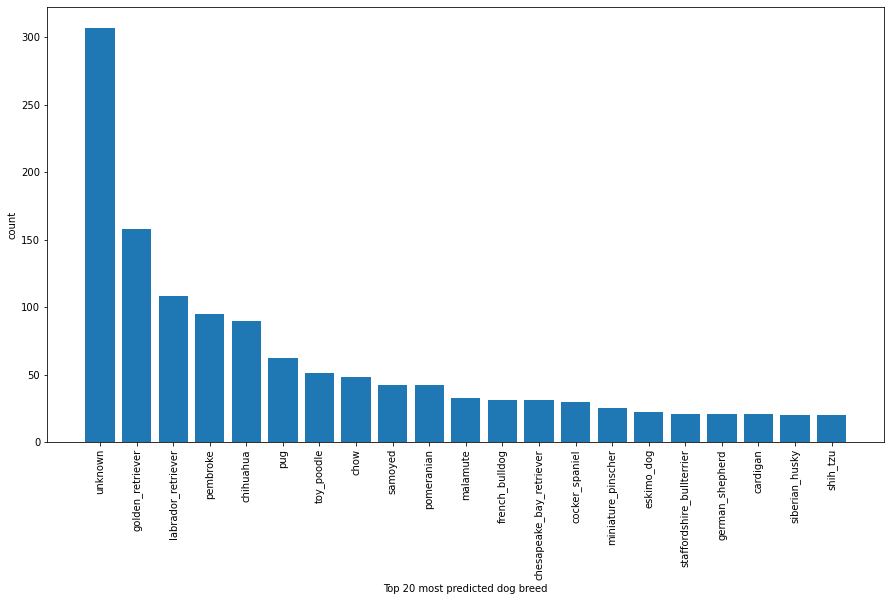

In [48]:
#top 20 most predicted breed

fig = plt.figure(figsize = (15,8))

#the y-axis represents the count for each predicted breed
y = twitter_archive_master.breed.value_counts().sort_values(ascending = False)[:21]

#the x-axis represents the labels for top 20 most predicted breeds 
x = y.keys()
#plot x,y
plt.bar(x, y)
#labeling the axes:
plt.xlabel('Top 20 most predicted dog breed')
plt.ylabel('count')
#rotate x_label:
plt.xticks(rotation = 90)
#display the plot
plt.savefig('C://Users//hangt//most_predicted_breed.png')
plt.show()



###### Pie chart of dog phases' proportions:

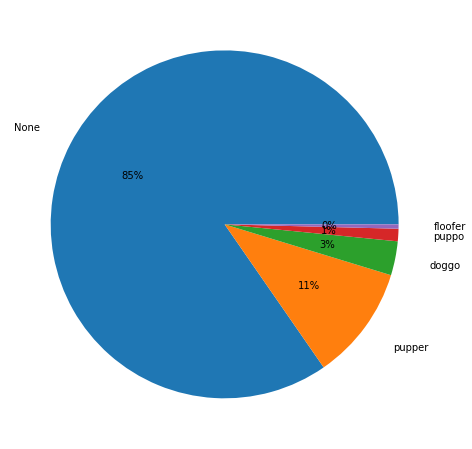

In [49]:
# pie chart on dog phases:

fig = plt.figure(figsize = (15,8))

dog_phase_count = twitter_archive_master.phase.value_counts()

plt.pie(dog_phase_count, labels = dog_phase_count.index, autopct = '%1.0f%%', labeldistance = 1.2)

plt.savefig('C://Users//hangt//dog_phase_pie.png');

###### Statistics of dog breed vs average's breed rating numerator

In [50]:
#dog breed

breed_rating_stats = twitter_archive_master.groupby('breed')['rating_numerator'].describe()

breed_rating_stats

,count,mean,std,min,25%,50%,75%,max
breed,,,,,,,,
afghan_hound,3.0,9.666667,5.773503,3.0,8.00,13.0,13.00,13.0
airedale,12.0,9.833333,2.249579,6.0,9.25,10.5,11.25,12.0
american_staffordshire_terrier,16.0,10.312500,3.070695,0.0,10.00,11.0,12.00,13.0
appenzeller,2.0,11.000000,2.828427,9.0,10.00,11.0,12.00,13.0
australian_terrier,2.0,11.500000,2.121320,10.0,10.75,11.5,12.25,13.0
...,...,...,...,...,...,...,...,...
welsh_springer_spaniel,4.0,9.500000,1.732051,8.0,8.00,9.5,11.00,11.0
west_highland_white_terrier,16.0,14.687500,18.539035,8.0,9.75,10.0,11.25,84.0
whippet,11.0,10.181818,1.834022,8.0,8.50,10.0,12.00,13.0


In [51]:
#sort breed_rating_states in descending order by 'mean'

breed_rating_stats.sort_values('mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
breed,,,,,,,,
clumber,1.0,27.000000,NaN,27.0,27.00,27.0,27.00,27.0
soft_coated_wheaten_terrier,15.0,20.800000,33.411290,3.0,7.00,10.0,11.50,121.0
unknown,307.0,16.710098,104.070853,0.0,7.00,10.0,11.00,1776.0
west_highland_white_terrier,16.0,14.687500,18.539035,8.0,9.75,10.0,11.25,84.0
great_pyrenees,15.0,14.666667,12.596296,9.0,11.00,12.0,12.50,60.0
...,...,...,...,...,...,...,...,...
maltese_dog,19.0,9.315789,2.887764,1.0,9.50,10.0,10.50,12.0
tibetan_terrier,4.0,9.250000,2.061553,7.0,8.50,9.0,9.75,12.0
scotch_terrier,1.0,9.000000,NaN,9.0,9.00,9.0,9.00,9.0


###### Correlation between retweet counts and favorite counts

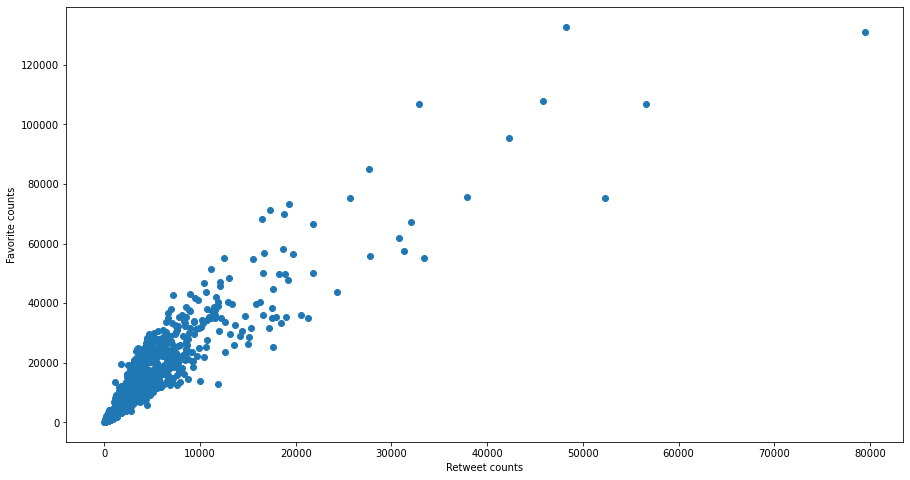

In [52]:
# Correlation between retweet count and favorite count

# Scatter plot

fig = plt.figure(figsize = (15,8))
plt.scatter(data = twitter_archive_master, x = 'retweet_count', y = 'favorite_count');
plt.xlabel('Retweet counts')
plt.ylabel('Favorite counts')
plt.savefig('C://Users//hangt//retweet_favorite_correlation.png');

###### Top 20 dog breeds with the most favorite counts

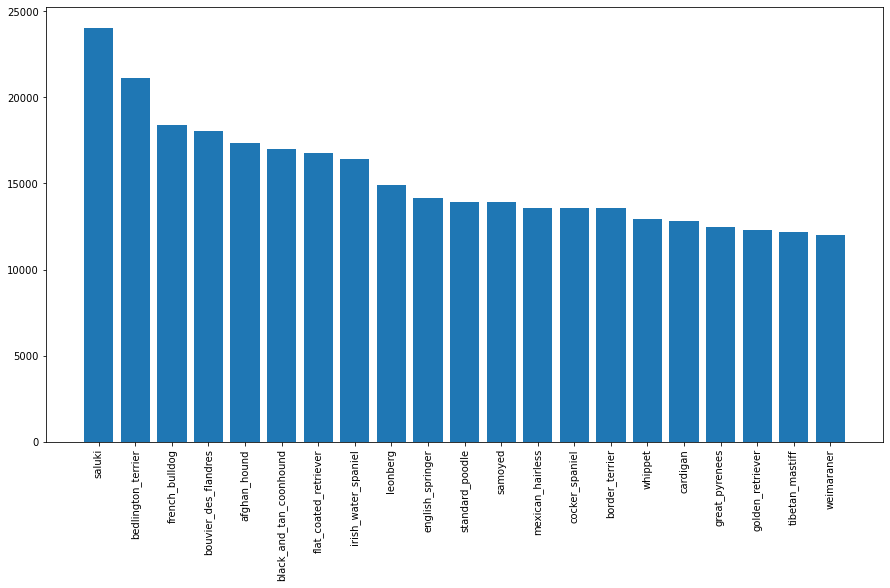

In [53]:
#calculate average favorite count by dog breeds

y = twitter_archive_master.groupby('breed').mean()['favorite_count'].sort_values(ascending = False)[:21]

#round y value

y = round(y, 2)

#creating x series, which is labels of the breeds
x = y.index

fig = plt.figure(figsize = (15,8))

plt.bar(x,y)

plt.xticks(rotation = 90)
plt.savefig('C://Users//hangt//most_liked_breeds.png');

# 6. <a id=6></a> Reporting

The `wrangle_report.html` describes step-by-step wrangling solution.

The `act_report.pdf` communicates all the insights and displays the visualization(s) produced from the wrangled data.